# Generate Sound with GAN

In [1]:
import numpy as np
import tensorflow as tf
from IPython.display import display, Audio

# Load the graph
tf.reset_default_graph()
saver = tf.train.import_meta_graph('model/infer/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
ckpt = tf.train.get_checkpoint_state('model/')

saver.restore(sess, ckpt.model_checkpoint_path)

# Create 50 random latent vectors z
_z = (np.random.rand(1, 100) * 2.) - 1

# Synthesize G(z)
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')
_G_z = sess.run(G_z, {z: _z})

# Play audio in notebook
display(Audio(_G_z[0, :, 0], rate=16000))

INFO:tensorflow:Restoring parameters from model/model.ckpt-0


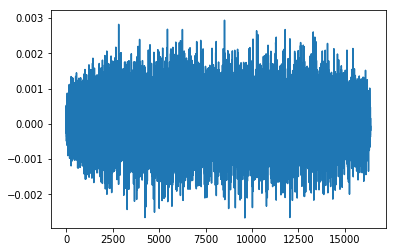

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(_G_z[0, :, 0])